In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
logins = pd.read_json('logins.json')

In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


Aggregate these login counts based on 15­minute time intervals,

In [5]:
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [13]:
logins['login_count']=1
logins.head(10)

,login_count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1
1970-01-01 20:21:41,1
1970-01-01 20:12:16,1
1970-01-01 20:35:47,1
1970-01-01 20:35:38,1


In [9]:
# making the date time as the index of our dataset by converting them to a datetme object
logins = logins.set_index(pd.to_datetime(logins['login_time'], unit='s'))[['login_count']]


In [12]:
logins15=logins.resample('15Min').sum()
logins15.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


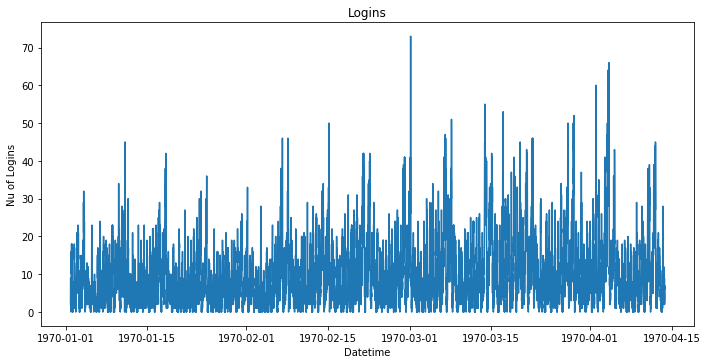

In [16]:
# Lets plot login times with 15 min delta
fig, ax = plt.subplots(figsize = (10,5))
plt.xlabel('Datetime')
plt.ylabel('Nu of Logins')
plt.tight_layout()
plt.title('Logins')
plt.plot(logins15.index, logins15.login_count)

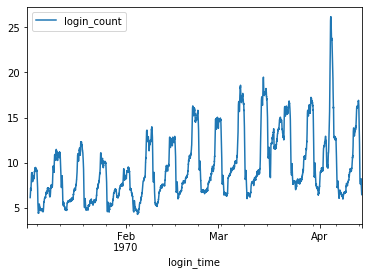

In [24]:
logins15.rolling(window=96).mean().plot()

It can be seen from the graph that the demans rises and falls on a weekly pattern, at the end of the week daysit increases and during the first day of the week it falls drastically.

Secondly, the highest demand occured dring the first week of April

For detailed analysis, we should check the day-night demands in order to understand clearly, we can take a specific period in a month, for instance February

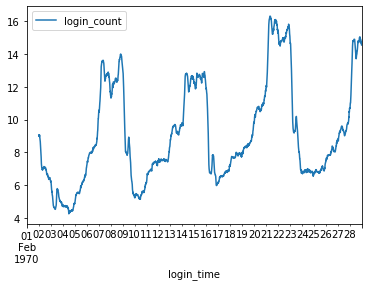

In [26]:
logins15.loc['1970-02'].rolling(window=96).mean().plot()
plt.show()

During the weekends, there are daily rises and falls, regrding the day or night time

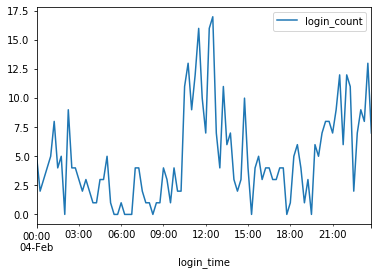

In [33]:
logins15.loc['1970-02-4'].plot()
plt.show()

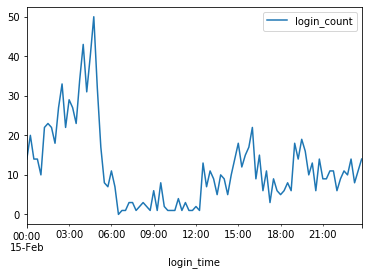

In [31]:
logins15.loc['1970-02-15'].plot()
plt.show()

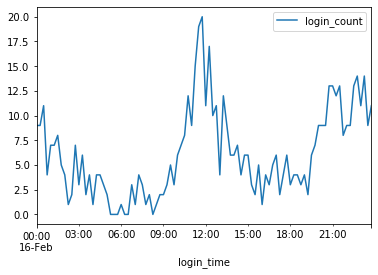

In [32]:
logins15.loc['1970-02-16'].plot()
plt.show()

It is obvious that during the weekends, login trends are in early morning  hours between 1 am- 5am, between 11 am- 2pm and 8-11 pm 

In [36]:
# Lets apply for a weekday of February
sampleday = datetime.datetime(1970, 3, 4)
sampleday.weekday()


2

March 4 is a Tuesdy. Lets look at the trends

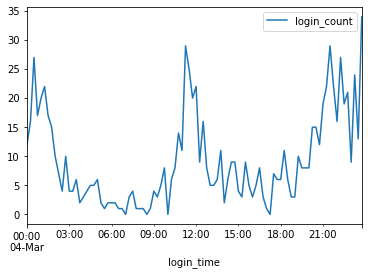

In [37]:
logins15.loc['1970-03-04'].plot()
plt.show()

Similar to the weekends, trends are between 11am- 1 pm, 9 pm-11 pm, and 1 am-3am

### Conclusion

We have 2 major conclusions

- Demand is greater on the weekends than the weekdays

- Deman is greatest around midnight and noon for both weekdays and weekends